In [6]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [7]:
num_frames = 100
timestep = 0.05
t_vals = np.linspace(0.0, (num_frames-1)*timestep, num_frames)
# print(t_vals)
# s_vals = np.linspace(0.0, 2*np.pi, 101)
s_vals = np.linspace(0.1, 1000.1, 101)
# s_vals = np.linspace(0, 100, 101)
# s_vals[0] = 1e-10
s_vals = s_vals[:-1]
print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

# get the range of k values
k_vals = fft.fftfreq(r_vals.shape[0], d=r_vals[1]-r_vals[0])
k_vals = fft.fftshift(k_vals)
# k_vals = 2 * np.pi * k_vals
# print(k_vals)
print(f"shape of k_vals : {k_vals.shape}")

[1.000e-01 1.010e+01 2.010e+01 3.010e+01 4.010e+01 5.010e+01 6.010e+01
 7.010e+01 8.010e+01 9.010e+01 1.001e+02 1.101e+02 1.201e+02 1.301e+02
 1.401e+02 1.501e+02 1.601e+02 1.701e+02 1.801e+02 1.901e+02 2.001e+02
 2.101e+02 2.201e+02 2.301e+02 2.401e+02 2.501e+02 2.601e+02 2.701e+02
 2.801e+02 2.901e+02 3.001e+02 3.101e+02 3.201e+02 3.301e+02 3.401e+02
 3.501e+02 3.601e+02 3.701e+02 3.801e+02 3.901e+02 4.001e+02 4.101e+02
 4.201e+02 4.301e+02 4.401e+02 4.501e+02 4.601e+02 4.701e+02 4.801e+02
 4.901e+02 5.001e+02 5.101e+02 5.201e+02 5.301e+02 5.401e+02 5.501e+02
 5.601e+02 5.701e+02 5.801e+02 5.901e+02 6.001e+02 6.101e+02 6.201e+02
 6.301e+02 6.401e+02 6.501e+02 6.601e+02 6.701e+02 6.801e+02 6.901e+02
 7.001e+02 7.101e+02 7.201e+02 7.301e+02 7.401e+02 7.501e+02 7.601e+02
 7.701e+02 7.801e+02 7.901e+02 8.001e+02 8.101e+02 8.201e+02 8.301e+02
 8.401e+02 8.501e+02 8.601e+02 8.701e+02 8.801e+02 8.901e+02 9.001e+02
 9.101e+02 9.201e+02 9.301e+02 9.401e+02 9.501e+02 9.601e+02 9.701e+02
 9.801

In [8]:
alpha0 = 0.5
d0 = 2.0

In [9]:
u_test = np.zeros((num_frames, k_vals.shape[0]))
for i in range(num_frames):
    for j in range(k_vals.shape[0]):
        u_test[i, j] = s_vals[i]**(alpha0-1) / (s_vals[i]**(alpha0) + d0*k_vals[j]**2)
# print(u_test)
# print(np.trapz(u_test, k_vals, axis=1).reshape(-1, 1)[0])
# u_test = u_test / np.trapz(u_test, k_vals, axis=1).reshape(-1, 1)

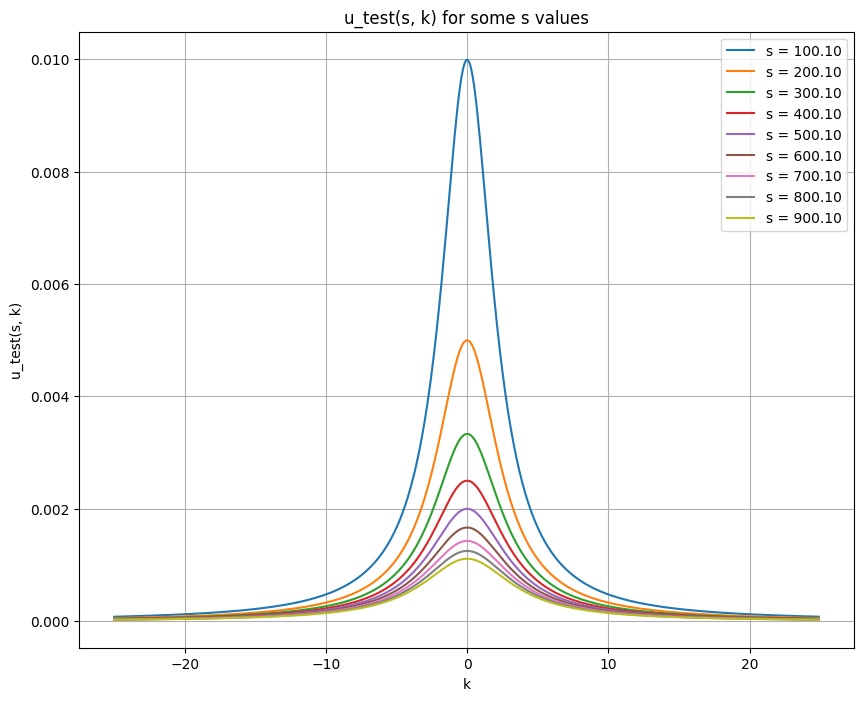

In [10]:
# plot u_test
# plot the u_pred(s, k) for some s values
plt.figure(figsize=(10, 8))
plt.title("u_test(s, k) for some s values")
plt.xlabel("k")
plt.ylabel("u_test(s, k)")
plt.grid()
for i in range(0, s_vals.shape[0], 10):
    if i == 0:
        continue
    plt.plot(k_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

$u(s, k) = \frac{s^{\alpha-1}}{s^{\alpha-1}+Dk^2}$